LAB 5 - Nearest Neighbors and Decision Trees
=========================

In this lab, as in the next two, we will explore different classification methods, and how we can compare their results. For those three labs, we will use a simplified version of the **[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) object recognition dataset**. 

This lab will use **decision trees** and **random forest** methods. In Lab 6, we will use neural networks, and in Lab 7 Support Vector Machines.

Important note
---------------

For this lab and the next two, **each student must write a report** (one report for the three labs together) which will be used during the oral exam. This report should highlight the different methods used during the labs, but also how you validated each method and compared their results.

Lab objectives
---------------

* Classification with decision trees and random forests.
* Cross-validation and evaluation.

The Data
----

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset has been collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of 60.000 32x32 colour images, split in 10 classes: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'.

*Reference: Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.* PDF available at https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf

For the purpose of the INFO-H-501 laboratories, we will use a subset of those images by only taking 3 different classes: 'airplane', 'bird' and 'horse'.

For each image, the data is presented in four forms: 
* The original 32x32x3 **RGB** image (as a size 3072 vector) as *images*
* The **grayscale** 32x32 image (as a size 1024 vector) as *images_gs*
* A size 256 **Histogram Of Gradient** vector (16 orientations x 16 blocks) as *images_hog*
* A size 200 vector with the **PCA** reduction of the RGB image as *images_pca*

The following code pre-loads all of this data:

In [1]:
import numpy as np
import os

class CIFAR10:    
    def __init__(self, path):
        self.path = path
        # Pre-load all data
        self.train = {}
        self.test = {}
        print('Pre-loading training data')
        self.train['images'] = np.load(os.path.join(path, 'images.npy')).astype('uint8')
        self.train['images_gs'] = np.load(os.path.join(path, 'images_gs.npy')).astype('uint8')
        self.train['images_hog'] = np.load(os.path.join(path, 'images_hog.npy'))
        self.train['images_pca'] = np.load(os.path.join(path, 'images_pca.npy'))
        self.train['labels'] = np.load(os.path.join(path, 'labels_.npy')).astype('uint8')
        print('Pre-loading test data')
        self.test['images'] = np.load(os.path.join(path, 'test_images.npy')).astype('uint8')
        self.test['images_gs'] = np.load(os.path.join(path, 'test_images_gs.npy')).astype('uint8')
        self.test['images_hog'] = np.load(os.path.join(path, 'test_images_hog.npy'))
        self.test['images_pca'] = np.load(os.path.join(path, 'test_images_pca.npy'))
        self.test['labels'] = np.load(os.path.join(path, 'test_labels.npy')).astype('uint8')
        
        self.labels = ['Airplane', 'Bird', 'Horse']

## Examples from the dataset

Pre-loading training data
Pre-loading test data


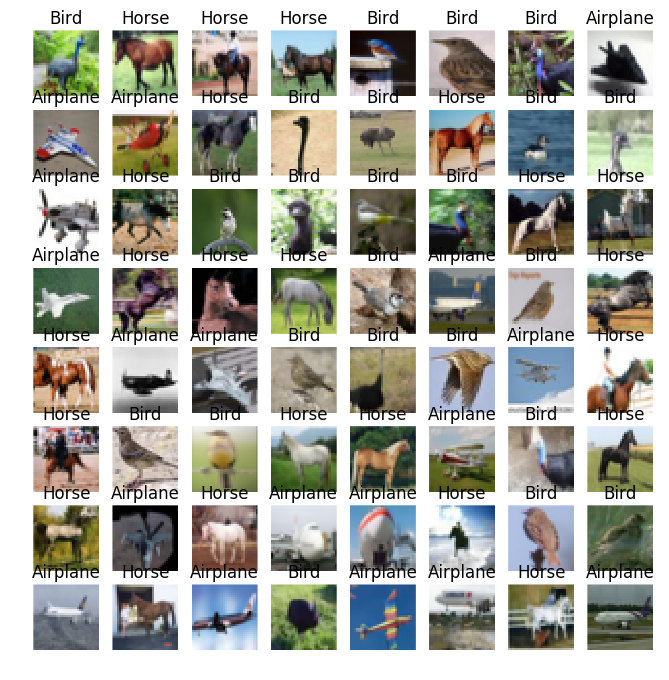

In [3]:
dataset = CIFAR10('E:/Dropbox/ULB/TPs/INFOH501/info-h-500-501/LABS1/CIFAR10')
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(dataset.train['images'][i].reshape((32,32,3)), interpolation='none')
    plt.title(dataset.labels[dataset.train['labels'][i]])
    plt.axis('off')
plt.show()

# 1. Nearest Neighbor

The following example uses the Nearest Neighbor algorithm on the RGB images in the dataset.

In [4]:
from sklearn.metrics import confusion_matrix

def evaluate_classifier(clf, test_data, test_labels):
    pred = clf.predict(test_data)
    C = confusion_matrix(pred, test_labels)
    return C.diagonal().sum()*100./C.sum(),C

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit( dataset.train['images_hog'], dataset.train['labels'] )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [7]:
# Evaluate Training error (=descriptive) :
accuracy, conf_mat = evaluate_classifier(clf, dataset.train['images_hog'], dataset.train['labels'])

In [8]:
print("Training accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Training accuracy: 100.00 %
Confusion matrix:
[[5000    0    0]
 [   0 5000    0]
 [   0    0 5000]]


In [10]:
# Evaluate Test error (=predictive) :
accuracy, conf_mat = evaluate_classifier(clf, dataset.test['images_hog'], dataset.test['labels'])

In [11]:
print("Test accuracy: %.2f %%"%accuracy)
print("Confusion matrix:")
print(conf_mat)

Test accuracy: 69.40 %
Confusion matrix:
[[609  63  26]
 [258 754 255]
 [133 183 719]]


Explain those results. **What could improve the performances of this classifier ?**

You do not need to code anything for this classifier.

2. Decision Trees
----

[Decision Trees](http://scikit-learn.org/stable/modules/tree.html#tree) classify the data by splitting the feature space according to simple, single-feature rules. Scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm for [its implementation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of the classifier. 

* **Create a simple Decision Tree classifier** using scikit-learn and train it on the CIFAR-10 training set. Which features from the dataset should you use ?
* Evaluate the performance of the classifier on the test dataset.
* Build a **full classification pipeline** to find the best parameters for this classifier with **[cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)**.

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(dataset.train['images_hog'], dataset.train['labels'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
print("Descriptive error:")
print(evaluate_classifier(clf, dataset.train['images_hog'], dataset.train['labels']))

Descriptive error:
(100.0, array([[5000,    0,    0],
       [   0, 5000,    0],
       [   0,    0, 5000]], dtype=int64))


In [8]:
print("Predictive error:")
print(evaluate_classifier(clf, dataset.test['images_hog'], dataset.test['labels']))

Predictive error:
(56.866666666666667, array([[596, 208, 154],
       [242, 524, 260],
       [162, 268, 586]], dtype=int64))


In [9]:
from sklearn.model_selection import StratifiedKFold

n_splits=5
kf = StratifiedKFold(n_splits)

max_depth = range(2,20,2)
for md in max_depth:
    acc_s = 0
    cm_s = np.zeros((3,3))
    for train,test in kf.split(dataset.train['images'], dataset.train['labels']):
        train_x = dataset.train['images_hog'][train]
        train_y = dataset.train['labels'][train]
        clf = tree.DecisionTreeClassifier(max_depth=md)
        clf.fit(train_x, train_y)
        
        test_x = dataset.train['images_hog'][test]
        test_y = dataset.train['labels'][test]
        acc, cm = evaluate_classifier(clf, test_x, test_y)
        acc_s += acc/n_splits
        cm_s += cm
    print("Max depth: %d"%md)
    print("Accuracy: %.2f %%"%acc_s)
    print("Confusion matrix:")
    print(cm_s)

Max depth: 2
Accuracy: 48.07 %
Confusion matrix:
[[ 3107.   955.  1286.]
 [ 1800.  3991.  3602.]
 [   93.    54.   112.]]
Max depth: 4
Accuracy: 55.32 %
Confusion matrix:
[[ 2575.   533.   505.]
 [ 1069.  2627.  1399.]
 [ 1356.  1840.  3096.]]
Max depth: 6
Accuracy: 58.26 %
Confusion matrix:
[[ 3093.   878.   704.]
 [ 1120.  2970.  1620.]
 [  787.  1152.  2676.]]
Max depth: 8
Accuracy: 59.68 %
Confusion matrix:
[[ 3008.   812.   576.]
 [ 1254.  3090.  1570.]
 [  738.  1098.  2854.]]
Max depth: 10
Accuracy: 59.71 %
Confusion matrix:
[[ 3015.   836.   648.]
 [ 1299.  3098.  1508.]
 [  686.  1066.  2844.]]
Max depth: 12
Accuracy: 59.58 %
Confusion matrix:
[[ 3087.   947.   662.]
 [ 1226.  2956.  1444.]
 [  687.  1097.  2894.]]
Max depth: 14
Accuracy: 58.59 %
Confusion matrix:
[[ 3102.   989.   717.]
 [ 1189.  2829.  1425.]
 [  709.  1182.  2858.]]
Max depth: 16
Accuracy: 58.19 %
Confusion matrix:
[[ 3112.  1041.   761.]
 [ 1162.  2730.  1352.]
 [  726.  1229.  2887.]]
Max depth: 18
Accura

In [11]:
crits = ['gini', 'entropy']
for crit in crits:
    acc_s = 0
    cm_s = np.zeros((3,3))
    for train,test in kf.split(dataset.train['images'], dataset.train['labels']):
        train_x = dataset.train['images_hog'][train]
        train_y = dataset.train['labels'][train]
        clf = tree.DecisionTreeClassifier(max_depth=10, criterion=crit)
        clf.fit(train_x, train_y)
        
        test_x = dataset.train['images_hog'][test]
        test_y = dataset.train['labels'][test]
        acc, cm = evaluate_classifier(clf, test_x, test_y)
        acc_s += acc/n_splits
        cm_s += cm
    print("Criterion: %s"%crit)
    print("Accuracy: %.2f %%"%acc_s)
    print("Confusion matrix:")
    print(cm_s)

Criterion: gini
Accuracy: 59.70 %
Confusion matrix:
[[ 3010.   832.   640.]
 [ 1302.  3093.  1508.]
 [  688.  1075.  2852.]]
Criterion: entropy
Accuracy: 58.81 %
Confusion matrix:
[[ 3105.   940.   695.]
 [ 1174.  2873.  1461.]
 [  721.  1187.  2844.]]


In [12]:
max_features = np.arange(0.1, 1.1, 0.1)
for mf in max_features:
    acc_s = 0
    cm_s = np.zeros((3,3))
    for train,test in kf.split(dataset.train['images'], dataset.train['labels']):
        train_x = dataset.train['images_hog'][train]
        train_y = dataset.train['labels'][train]
        clf = tree.DecisionTreeClassifier(max_depth=10, max_features=mf)
        clf.fit(train_x, train_y)
        
        test_x = dataset.train['images_hog'][test]
        test_y = dataset.train['labels'][test]
        acc, cm = evaluate_classifier(clf, test_x, test_y)
        acc_s += acc/n_splits
        cm_s += cm
    print("Max features: %d %%"%(mf*100))
    print("Accuracy: %.2f %%"%acc_s)
    print("Confusion matrix:")
    print(cm_s)

Max features: 10 %
Accuracy: 58.04 %
Confusion matrix:
[[ 3022.   871.   622.]
 [ 1137.  2823.  1517.]
 [  841.  1306.  2861.]]
Max features: 20 %
Accuracy: 58.41 %
Confusion matrix:
[[ 3112.   951.   747.]
 [ 1176.  2853.  1457.]
 [  712.  1196.  2796.]]
Max features: 30 %
Accuracy: 59.23 %
Confusion matrix:
[[ 3093.   862.   690.]
 [ 1232.  2974.  1493.]
 [  675.  1164.  2817.]]
Max features: 40 %
Accuracy: 60.21 %
Confusion matrix:
[[ 3116.   885.   589.]
 [ 1180.  2987.  1482.]
 [  704.  1128.  2929.]]
Max features: 50 %
Accuracy: 59.86 %
Confusion matrix:
[[ 3134.   853.   694.]
 [ 1172.  2978.  1439.]
 [  694.  1169.  2867.]]
Max features: 60 %
Accuracy: 59.59 %
Confusion matrix:
[[ 3082.   888.   675.]
 [ 1161.  2914.  1382.]
 [  757.  1198.  2943.]]
Max features: 70 %
Accuracy: 59.61 %
Confusion matrix:
[[ 3020.   804.   622.]
 [ 1218.  3010.  1467.]
 [  762.  1186.  2911.]]
Max features: 80 %
Accuracy: 59.33 %
Confusion matrix:
[[ 3078.   911.   651.]
 [ 1220.  2993.  1521.]
 

**Evaluate your best classifier** on the test set. How can you compare it to the classifier with default parameters ?

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=10, max_features=0.4)
clf.fit(dataset.train['images_hog'], dataset.train['labels'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
print("Descriptive accuracy:")
print(evaluate_classifier(clf, dataset.train['images_hog'], dataset.train['labels']))

Descriptive accuracy:
(79.439999999999998, array([[3995,  395,  230],
       [ 686, 4021,  870],
       [ 319,  584, 3900]], dtype=int64))


In [15]:
print("Predictive accuracy:")
print(evaluate_classifier(clf, dataset.test['images_hog'], dataset.test['labels']))

Predictive accuracy:
(58.966666666666669, array([[608, 157, 138],
       [258, 598, 299],
       [134, 245, 563]], dtype=int64))


### PCA / Norm

Don't really improve anything

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dataset.train['images_hog'])
#train_data_norm = (dataset.train['images_hog'] - dataset.train['images_hog'].mean(axis=0))/dataset.train['images_hog'].std(axis=0)
#test_data_norm = (dataset.test['images_hog'] - dataset.train['images_hog'].mean(axis=0))/dataset.train['images_hog'].std(axis=0)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
evr_c = np.cumsum(pca.explained_variance_ratio_)
for i,c in enumerate(evr_c):
    if( c > 0.9 ): 
        print(i,c)
        break

153 0.900838509124


In [30]:
pca = PCA(n_components=153)
pca.fit(dataset.train['images_hog'])

train_data_pca = pca.transform(dataset.train['images_hog'])
test_data_pca = pca.transform(dataset.test['images_hog'])

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=10, max_features=0.4)
clf.fit(train_data_norm, dataset.train['labels'])

print("Descriptive accuracy:")
print(evaluate_classifier(clf, train_data_norm, dataset.train['labels']))

print("Predictive accuracy:")
print(evaluate_classifier(clf, test_data_norm, dataset.test['labels']))

Descriptive accuracy:
(78.5, array([[3944,  354,  243],
       [ 673, 4017,  943],
       [ 383,  629, 3814]], dtype=int64))
Predictive accuracy:
(60.100000000000001, array([[623, 147, 127],
       [235, 624, 317],
       [142, 229, 556]], dtype=int64))


3. Random Forests
----

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers use multiple decision trees trained on "weaker" datasets (less data and/or less features), averaging the results so as to reduce over-fitting.

* Use scikit-learn to **create a Random Forest classifier** on the CIFAR-10 data. 
* **Use cross-validation to test different parameters**
* **Evaluate your best classifier on the test set**. 
* Compare the results with the previous classifiers.

In [33]:
from sklearn import ensemble

estimators = np.arange(1, 20, 2)
for es in estimators:
    acc_s = 0
    cm_s = np.zeros((3,3))
    for train,test in kf.split(dataset.train['images'], dataset.train['labels']):
        train_x = dataset.train['images_hog'][train]
        train_y = dataset.train['labels'][train]
        clf = ensemble.RandomForestClassifier(n_estimators=es, max_depth=10, max_features=0.4)
        clf.fit(train_x, train_y)
        
        test_x = dataset.train['images_hog'][test]
        test_y = dataset.train['labels'][test]
        acc, cm = evaluate_classifier(clf, test_x, test_y)
        acc_s += acc/n_splits
        cm_s += cm
    print("Estimators: %d"%(es))
    print("Accuracy: %.2f %%"%acc_s)
    print("Confusion matrix:")
    print(cm_s)

Estimators: 1
Accuracy: 57.63 %
Confusion matrix:
[[ 3032.   912.   721.]
 [ 1169.  2834.  1501.]
 [  799.  1254.  2778.]]
Estimators: 3
Accuracy: 63.06 %
Confusion matrix:
[[ 3330.   832.   611.]
 [ 1046.  3021.  1281.]
 [  624.  1147.  3108.]]
Estimators: 5
Accuracy: 66.38 %
Confusion matrix:
[[ 3492.   770.   487.]
 [  948.  3160.  1208.]
 [  560.  1070.  3305.]]
Estimators: 7
Accuracy: 68.33 %
Confusion matrix:
[[ 3567.   747.   442.]
 [  920.  3219.  1094.]
 [  513.  1034.  3464.]]
Estimators: 9
Accuracy: 69.85 %
Confusion matrix:
[[ 3612.   733.   399.]
 [  901.  3300.  1035.]
 [  487.   967.  3566.]]
Estimators: 11
Accuracy: 70.63 %
Confusion matrix:
[[ 3616.   712.   350.]
 [  926.  3339.  1011.]
 [  458.   949.  3639.]]
Estimators: 13
Accuracy: 70.75 %
Confusion matrix:
[[ 3613.   720.   386.]
 [  929.  3351.   965.]
 [  458.   929.  3649.]]
Estimators: 15
Accuracy: 71.57 %
Confusion matrix:
[[ 3636.   684.   347.]
 [  905.  3416.   969.]
 [  459.   900.  3684.]]
Estimators: 1

In [34]:
from sklearn import ensemble

estimators = np.arange(1, 20, 2)
for es in estimators:
    acc_s = 0
    cm_s = np.zeros((3,3))
    for train,test in kf.split(dataset.train['images'], dataset.train['labels']):
        train_x = dataset.train['images_hog'][train]
        train_y = dataset.train['labels'][train]
        clf = ensemble.RandomForestClassifier(n_estimators=es, max_depth=6, max_features=0.4)
        clf.fit(train_x, train_y)
        
        test_x = dataset.train['images_hog'][test]
        test_y = dataset.train['labels'][test]
        acc, cm = evaluate_classifier(clf, test_x, test_y)
        acc_s += acc/n_splits
        cm_s += cm
    print("Estimators: %d"%(es))
    print("Accuracy: %.2f %%"%acc_s)
    print("Confusion matrix:")
    print(cm_s)

Estimators: 1
Accuracy: 57.19 %
Confusion matrix:
[[ 2904.   703.   630.]
 [ 1131.  2739.  1434.]
 [  965.  1558.  2936.]]
Estimators: 3
Accuracy: 63.59 %
Confusion matrix:
[[ 3336.   795.   564.]
 [  974.  3032.  1266.]
 [  690.  1173.  3170.]]
Estimators: 5
Accuracy: 66.07 %
Confusion matrix:
[[ 3463.   760.   519.]
 [  894.  3132.  1165.]
 [  643.  1108.  3316.]]
Estimators: 7
Accuracy: 66.92 %
Confusion matrix:
[[ 3443.   725.   422.]
 [  929.  3156.  1139.]
 [  628.  1119.  3439.]]
Estimators: 9
Accuracy: 67.74 %
Confusion matrix:
[[ 3507.   778.   439.]
 [  914.  3179.  1086.]
 [  579.  1043.  3475.]]
Estimators: 11
Accuracy: 68.81 %
Confusion matrix:
[[ 3540.   725.   423.]
 [  906.  3226.  1021.]
 [  554.  1049.  3556.]]
Estimators: 13
Accuracy: 68.81 %
Confusion matrix:
[[ 3543.   729.   402.]
 [  913.  3267.  1087.]
 [  544.  1004.  3511.]]
Estimators: 15
Accuracy: 69.35 %
Confusion matrix:
[[ 3576.   713.   419.]
 [  906.  3303.  1057.]
 [  518.   984.  3524.]]
Estimators: 1

In [35]:
clf = ensemble.RandomForestClassifier(n_estimators=es, max_depth=10, max_features=0.4)
clf.fit(dataset.train['images_hog'], dataset.train['labels'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
print("Descriptive accuracy:")
print(evaluate_classifier(clf, dataset.train['images_hog'], dataset.train['labels']))

print("Predictive accuracy:")
print(evaluate_classifier(clf, dataset.test['images_hog'], dataset.test['labels']))

Descriptive accuracy:
(91.673333333333332, array([[4456,  154,   56],
       [ 420, 4677,  326],
       [ 124,  169, 4618]], dtype=int64))
Predictive accuracy:
(73.266666666666666, array([[738, 126,  64],
       [189, 716, 192],
       [ 73, 158, 744]], dtype=int64))
